In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [ ]:
#ANALISIS DEL DATASET RATINGS

In [2]:
#Cargamos el dataset de ratings en un dataframe de pandas
ratings = pd.read_csv('../ml-latest-small/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
#Tamaño del dataset
ratings.shape

(100836, 4)

In [4]:
#Eliminamos la columna de timestamp ya que no la utilizamos
del ratings['timestamp']

In [28]:
#Verificamos si hay algun valor nulo en el dataset
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [5]:
#Mostramos las caracteristicas de la columna rating
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [8]:
#Realizamos el calculo de los ratings que existen en el dataset y su cantidad de ocurrencias
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [27]:
#Calculamos el rating promedio para cada pelicula en base a sus calificaciones
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

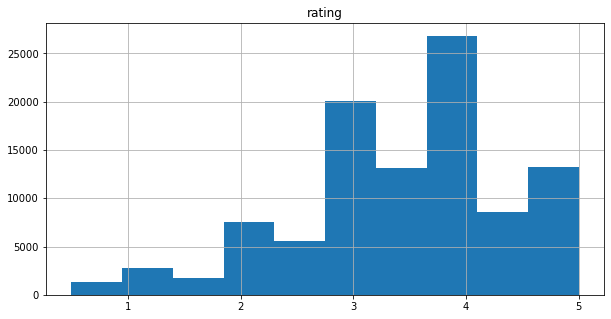

In [6]:
%matplotlib inline
#Realizamos un histograma de los ratings del dataset segun su cantidad de ocurrencias
ratings.hist(column='rating', figsize=(10,5))

<AxesSubplot:>

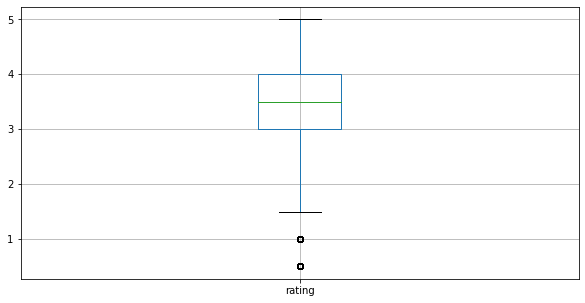

In [7]:
#Realizamos un grafico boxplot con las caracteristicas mostradas en la funcion .describe()
ratings.boxplot(column='rating', figsize=(10,5))

In [ ]:
#ANALISIS DEL DATASET MOVIES

In [12]:
movies = pd.read_csv('../ml-latest-small/movies.csv', sep=',')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [13]:
#Verificamos el tamaño del dataset
movies.shape

(9742, 3)

In [14]:
#Verificamos si existe algun valor nulo en el dataset
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [21]:
#Creamos una columna con el año de la pelicula
#Ya que el valor del año se encuentra en el titulo
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
5,6,Heat (1995),Action|Crime|Thriller,1995
6,7,Sabrina (1995),Comedy|Romance,1995
7,8,Tom and Huck (1995),Adventure|Children,1995
8,9,Sudden Death (1995),Action,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995


In [40]:
def splitListToRows(row,row_accumulator,target_column,separator):
    split_row = row[target_column].split(separator)
    for s in split_row:
        new_row = row.to_dict()
        new_row[target_column] = s
        row_accumulator.append(new_row)

In [41]:
def splitDataFrameList(df,target_column,separator):
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

movies_genres_split = splitDataFrameList(movies,"genres","|")

In [42]:
movies_genres_split

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure,1995
1,1,Toy Story (1995),Animation,1995
2,1,Toy Story (1995),Children,1995
3,1,Toy Story (1995),Comedy,1995
4,1,Toy Story (1995),Fantasy,1995
...,...,...,...,...
22079,193583,No Game No Life: Zero (2017),Fantasy,2017
22080,193585,Flint (2017),Drama,2017
22081,193587,Bungo Stray Dogs: Dead Apple (2018),Action,2018
22082,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,2018


Text(0.5, 0, 'Genero')

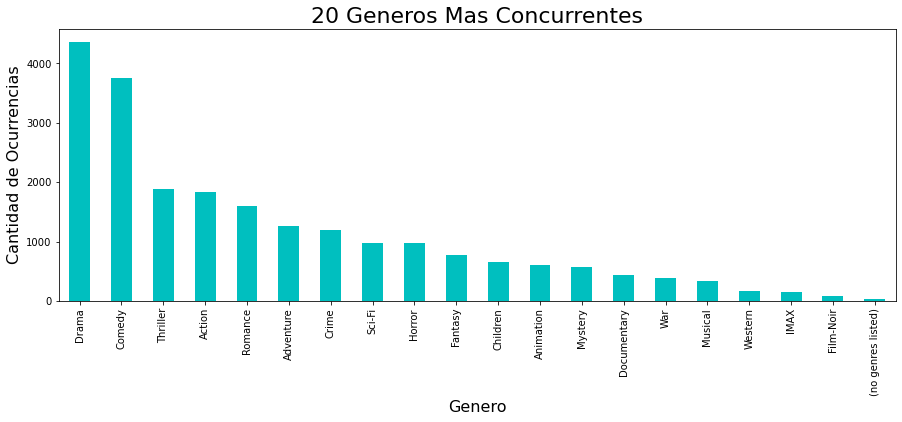

In [43]:
genres = movies_genres_split.genres
genres.value_counts().plot(kind='bar',figsize=(15,5), color = 'c');
plt.title("20 Generos Mas Concurrentes", fontsize=22)
plt.ylabel("Cantidad de Ocurrencias", fontsize=16)
plt.xlabel("Genero", fontsize=16)

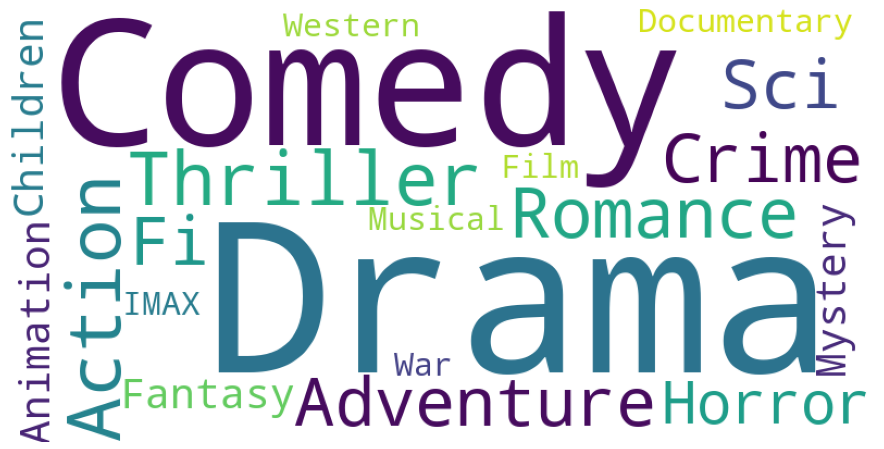

In [44]:
keywords_counts = movies_genres_split.genres.value_counts().index
keywors_list = list(keywords_counts)
text = ' '.join(keywors_list)
 
wordcloud = WordCloud( background_color = 'white', max_words=20, scale=2, random_state=1).generate(str(text))
f, ax = plt.subplots(figsize=(16, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

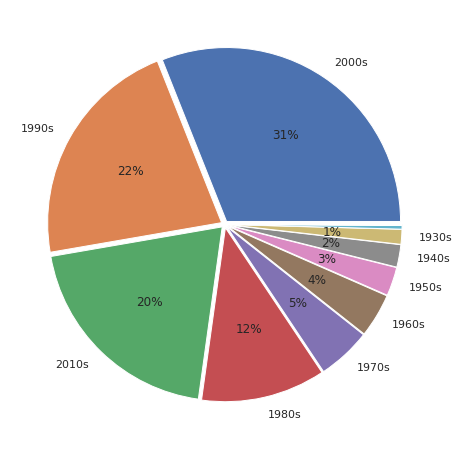

In [50]:
# numbers of movies released in each decade
def count_pie(series):
    counts=series.value_counts()
    counts=counts/counts.sum()
    labels=['' if num<0.01 else str(year) for (year,num) in counts.items()]
    f, ax = plt.subplots(figsize=(8, 8))
    explode = [0.02 if counts.iloc[i] < 100 else 0.001 for i in range(counts.size)]
    plt.pie(counts,labels=labels,autopct=lambda x:'{:1.0f}%'.format(x) if x > 1 else '',explode=explode)
    plt.show()

def count_decade_pie(df):
    count_pie(df.year.dropna().apply(lambda x:str(int(x[:4])//10*10)+'s'))
    
count_decade_pie(gen)

In [21]:
movies.tail()


,movieId,title,genres,year
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


In [63]:
movies_with_ratings = movies.merge(ratings, on='movieId', how='inner')
movies_with_ratings

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,184,3.5
100833,193585,Flint (2017),Drama,2017,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,184,3.5


In [64]:
#Calculamos el rating promedio para cada pelicula en base a sus calificaciones
average_movie = movies_with_ratings[['movieId','rating']].groupby('movieId').mean()
average_movie

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000
